# Feature Analysis

In [1]:
import pandas as pd
import math

In [2]:
filenames1 = ['pionminus','pionminus1','pionminus2','pionminus3','pionminus4','pionminus5']
filenames1 = ['ccbar0','phi0']
filenames1 = ['phi_new00','ccbar_new00']#,'ccbar_new00'
filepath = "/home/yoren/bnl/PHENIX/ee/ML/"

hadron_weight = 25000*50/500

In [3]:
if True:
    data = pd.read_csv(filepath+f'{filenames1[0]}.csv')
    for ifile in range(1,len(filenames1)):
        idata = pd.read_csv(filepath+f'{filenames1[ifile]}.csv')
        data = pd.concat([data,idata], sort=False)

    data = data.sample(frac = 1)
    float_columns=('Pt', 'Phi0', 'The0', 'PhiDC', 'ZDC', 'Alpha', 'Ecore',\
                   'reconpt','reconphi0','reconthe0','px','py','pz','vx','vy','vz',\
                   'sdphi0','sdthe0','SecondHitPhiR0','SecondHitPhiL0','SecondHitTheR0','SecondHitTheL0',\
                   'sdphi1','sdthe1','SecondHitPhiR1','SecondHitPhiL1','SecondHitTheR1','SecondHitTheL1',\
                   'sdphi2','sdthe2','SecondHitPhiR2','SecondHitPhiL2','SecondHitTheR2','SecondHitTheL2',\
                   'sdphi3','sdthe3','SecondHitPhiR3','SecondHitPhiL3','SecondHitTheR3','SecondHitTheL3')
    int_columns=('NBDThit','Centrality', 'Charge', 'Arm','IsTrue0','IsTrue1','IsTrue2','IsTrue3')
    
    for float_column in float_columns:
        data[float_column] = data[float_column].astype('float32')
    for int_column in int_columns:
        data[int_column] = data[int_column].astype('int32')
    data.head()
    
    data = data[(data['Pt'] < 25) & (data['Ecore'] > 0.1) & (data['Ecore'] < 25) & (data['reconthe0'] < 25) & (data['reconthe0'] > -25) ]
    
    data.loc[idata['sdphi2'] == -10, 'IsTrue3'] = 1
    data.loc[idata['sdphi3'] == -10, 'IsTrue3'] = 1
    data['IsTrue0'] = data['IsTrue0']*data['IsTrue1'] * data['IsTrue2']*data['IsTrue3']
    data.loc[idata['IsTrue0'] > 0, 'IsTrue0'] = 1

    data['sdphi2'] = data['sdphi2'] + 10
    data['sdphi3'] = data['sdphi3'] + 10

    data.loc[data['sdphi2'] > 0, 'sdphi2'] = 1
    data.loc[data['sdphi3'] > 0, 'sdphi3'] = 1

    data.head()

In [4]:
data.head()

NBDThit        Pt      Phi0      The0     PhiDC        ZDC     Alpha  \
473110         3  0.572353  0.431922  1.429688  0.793457  30.591970 -0.182861   
4883144        3  1.042527  3.213600  1.877930  3.425781 -70.471779 -0.114136   
4520688        3  1.250240  3.323981  1.401367  3.160156  37.703335  0.083008   
6070194        3  0.794108  0.557432  1.596680  0.301270  -5.832980  0.126953   
3867756        3  0.708797 -0.819189  1.255859 -0.520020  71.059097 -0.157227   

            Ecore  Centrality  Charge  ...  SecondHitPhiL2  SecondHitTheR2  \
473110   0.230887          53       1  ...       21.156967       -5.236496   
4883144  1.002967          49       1  ...        4.086535       -9.875695   
4520688  1.310627          78      -1  ...      -99.000000       17.103542   
6070194  0.628999          39      -1  ...      -99.000000        7.729595   
3867756  0.662253          85       1  ...      -99.000000      -99.000000   

         SecondHitTheL2  sdphi3     sdthe3  IsTrue3  SecondHitPhiR3  \
473110        -4.509115     0.0 -10.000000        1      -99.000000   
4883144      -11.923428     0.0 -10.000000        1      -99.000000   
4520688      -99.000000     1.0   0.434975        1      -99.000000   
6070194      -99.000000     1.0   0.440747        1       27.292984   
3867756      -99.000000     1.0   0.137286        1      -99.000000   

         SecondHitPhiL3  SecondHitTheR3  SecondHitTheL3  
473110       -99.000000      -99.000000      -99.000000  
4883144        5.571569      -99.000000       14.045084  
4520688      -99.000000      -99.000000      -99.000000  
6070194       15.358250       11.764338       11.649346  
3867756      -99.000000      -99.000000      -99.000000  

[5 rows x 48 columns]

In [5]:
print(data.size, data.shape)

494096832 (10293684, 48)


In [6]:
# удалим лишние колонки
data = data.drop(columns = ['IsTrue1','IsTrue2','IsTrue3','px','py','pz','vx','vy','vz','sdphi0','sdphi1','sdthe0','sdthe1','sdthe2','sdthe3','reconphi0','reconthe0','Phi0', 'The0', 'PhiDC', 'ZDC'])

In [7]:
import matplotlib.pyplot as plt

def analysis(data: pd.DataFrame):
    fig, ax = plt.subplots(4, 3, figsize=(15, 6))
    for i, feature in enumerate(['IsTrue0', 'Pt', 'Alpha', 'Ecore','SecondHitPhiR0','SecondHitPhiL0','SecondHitTheR0','SecondHitTheL0','SecondHitPhiR1','SecondHitPhiL1','SecondHitTheR1','SecondHitTheL1' ]):
        x, y = divmod(i, 3)
        data[feature].plot.hist(ax=ax[x][y], ylabel='', title=feature, color='skyblue', logy=True)


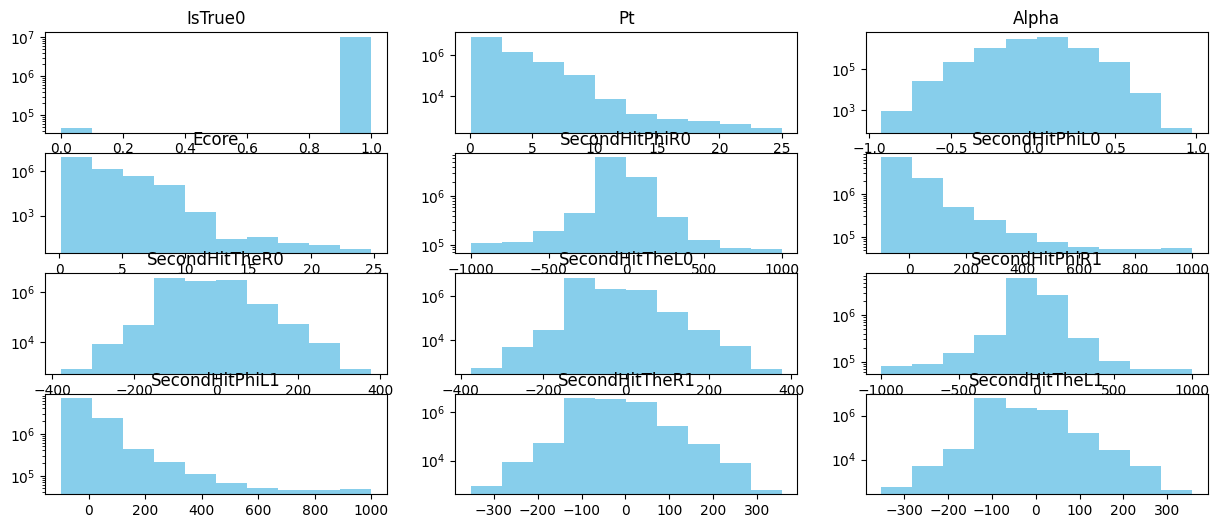

In [8]:
analysis(data)

+ Видим, что impressions имеют только одно значение, поэтому их можно удалить.
+ Таргет-переменная clicks сильно несбалансирована. Возможно, стоит использовать балансировку весов, а также в качестве оценки моделей использовать f1 и ROC AUC.
+ У campaign_clicks нулевых значений сильно больше, чем ненулевых, следовательно, можно трансформировать в бинарную фичу
+ os_id со значениями больше 6 встречается редко, можно объединить в одну категорию
+ Аналогично с редкими значениями zone_id

# Feature Engineering

In [9]:
def feature_engineering(data: pd.DataFrame) -> pd.DataFrame:
    # делим выборку на train и test
    #data = data.sort_values(by='date_time', ignore_index=True)
    #cut_off_val = data[data['date_time'] < pd.to_datetime('2021-10-01')].index[-1]
    #cut_off_test = data[data['date_time'] < pd.to_datetime('2021-10-02')].index[-1]

    cut_off_val =  int (data.shape[0]/3)
    cut_off_test = int (data.shape[0]/3*2 + 1)

    print(cut_off_val,cut_off_test)

    y = data['IsTrue0']
    data = data.drop(columns = ['IsTrue0'])
    data_train, data_test = data[:cut_off_test], data[cut_off_test:]
    y_train, y_test = y.iloc[:cut_off_test], y.iloc[cut_off_test:]
    
    # делаем one hot encodings
    #enc = OneHotEncoder(drop='first', handle_unknown='ignore')
    #enc.fit(data_train)
    #transformed_train = enc.transform(data_train)
    #transformed_test = enc.transform(data_test)
    
    return data_train, data_test, y_train, y_test,cut_off_val

In [10]:
X_train_all, X_test, y_train_all, y_test, cut_off_val = feature_engineering(data)

3431228 6862457


In [11]:
X_test

NBDThit        Pt     Alpha     Ecore  Centrality  Charge  Arm  \
5138796        3  0.940732  0.115234  1.029386           2      -1    1   
2282771        3  0.246265  0.423828  0.192484          43      -1    1   
5569893        1  0.594600 -0.190796  0.624459          40       1    1   
3558539        1  0.516153  0.198730  0.427897          55      -1    0   
4247526        1  0.241162  0.466797  0.331350          14      -1    1   
...          ...       ...       ...       ...         ...     ...  ...   
3787336        3  3.963180  0.025513  4.076050          36      -1    1   
850720         1  1.234013  0.082886  1.438734          66      -1    0   
4629869        3  1.270711 -0.081299  1.153626          48       1    1   
3151599        3  8.212703 -0.012711  6.978718          89       1    0   
3136016        7  0.628044 -0.172607  0.751755          17       1    1   

          reconpt  SecondHitPhiR0  SecondHitPhiL0  ...  sdphi2  \
5138796  0.807663       -7.023918        2.926346  ...     1.0   
2282771  0.426173     -209.297714      -99.000000  ...     1.0   
5569893  0.970119      -41.375359      -99.000000  ...     1.0   
3558539  0.496892      -99.000000      -99.000000  ...     0.0   
4247526  0.311596      940.925232      940.807129  ...     0.0   
...           ...             ...             ...  ...     ...   
3787336  5.997833        8.373797        8.372021  ...     1.0   
850720   1.298138     -290.444885      -99.000000  ...     1.0   
4629869  1.460389      -99.000000      -99.000000  ...     1.0   
3151599  6.581121      -32.718178      -99.000000  ...     1.0   
3136016  0.434614      -99.000000      -99.000000  ...     1.0   

         SecondHitPhiR2  SecondHitPhiL2  SecondHitTheR2  SecondHitTheL2  \
5138796       14.244115        8.578439        0.395906        0.716853   
2282771       16.513947        6.119312      -11.263769       -9.334871   
5569893       14.537814        8.830769       -6.062990       -6.082620   
3558539      -99.000000      -99.000000      -99.000000      -99.000000   
4247526      -99.000000       22.375935      -99.000000       -8.919096   
...                 ...             ...             ...             ...   
3787336       28.204330       26.980028        3.321016        3.636241   
850720       -99.000000      -99.000000      -99.000000      -99.000000   
4629869       10.097913        6.713615       -7.293449       -7.484953   
3151599       52.351109       51.148022       -7.069003       -7.755827   
3136016        0.000000       15.594144        0.000000       -1.300434   

         sdphi3  SecondHitPhiR3  SecondHitPhiL3  SecondHitTheR3  \
5138796     0.0      -99.000000       11.557034      -99.000000   
2282771     1.0       -0.000000        4.463737       14.385530   
5569893     0.0      -99.000000      -99.000000      -99.000000   
3558539     1.0      -23.392321      -99.000000       -2.820487   
4247526     1.0       -0.927897      953.728699       -5.210141   
...         ...             ...             ...             ...   
3787336     0.0      -99.000000       37.873196      -99.000000   
850720      0.0      -99.000000      -99.000000      -99.000000   
4629869     0.0      -99.000000       43.656567      -99.000000   
3151599     1.0       36.951523       35.189655       -6.266300   
3136016     0.0      -99.000000        9.858126      -99.000000   

         SecondHitTheL3  
5138796      -13.693545  
2282771      -10.750531  
5569893      -99.000000  
3558539      -99.000000  
4247526       -0.961039  
...                 ...  
3787336       -0.857225  
850720       -99.000000  
4629869       15.223932  
3151599       -7.659824  
3136016        0.315704  

[3431227 rows x 26 columns]

In [12]:
X_train, X_val = X_train_all[:cut_off_val], X_train_all[cut_off_val:]
y_train, y_val = y_train_all[:cut_off_val], y_train_all[cut_off_val:]
w_train, w_val = y_train-1, y_val-1
w_test = y_test-1
w_train_all = y_train_all - 1
w_train = w_train*(-hadron_weight)+1
w_val = w_val*(-hadron_weight)+1
w_test = w_test*(-hadron_weight)+1
w_train_all = w_train_all*(-hadron_weight)+1

+ Увидели, что количество кликов меняется в зависимости от дня недели и часа, добавим в качестве фичей
+ Также, добавим интеракции между этими двумя переменными, так как в разные дни недели разные часы могут по-разному влиять на колличество кликов
+ banner_id удалила, так как предполагаю, что модель должна уметь предсказывать клики для новых баннеров тоже.
+ Так как все оставшиеся фичи являются категориальными, сделали one-hot-encoding


+ В качестве теста берем последний день датасета, в качестве валидации -- предпоследний

# Create Model

In [13]:
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate= 0.1, max_features=2, max_depth=2, random_state=0)
gb_clf.fit(X_train, y_train, w_train)

predicted = gb_clf.predict(X_test)

# calculating the main quality metrics
print(metrics.classification_report(y_test, predicted))

print('confusion matrix')
print(metrics.confusion_matrix(y_test, predicted))

              precision    recall  f1-score   support

           0       0.00      1.00      0.01     15503
           1       1.00      0.07      0.13   3415724

    accuracy                           0.07   3431227
   macro avg       0.50      0.53      0.07   3431227
weighted avg       1.00      0.07      0.13   3431227

confusion matrix
[[  15461      42]
 [3174425  241299]]


In [14]:
# search for parameters
# https://www.kaggle.com/hatone/gradientboostingclassifier-with-gridsearchcv
import time
from sklearn.model_selection import GridSearchCV

start = time.time() 

parameters = {
    "loss":["log_loss"],
    "learning_rate": [0.2],
    "min_samples_split": [0.01],
    "max_depth":[12],
    "max_features":["sqrt"],
    "criterion": ['squared_error'],
    "n_estimators":[20]
    }

classif = GradientBoostingClassifier()
classif.set_params(init='zero')

clf = GridSearchCV(classif, parameters, cv=3, n_jobs=8)

clf.fit(X_train, y_train, sample_weight=w_train)
print('точность: ', clf.score(X_test, y_test))

# getting the best parameters ans score
print(clf.best_params_)
print(clf.best_score_)

stop = time.time()    
print('time of execution (sec)', stop - start)

точность:  0.7679730895099625
{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_split': 0.01, 'n_estimators': 20}
0.814451266413125
time of execution (sec) 479.684433221817


# Cross Validation

In [15]:
predicted = clf.predict(X_test)
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.02      0.95      0.04     15503
           1       1.00      0.77      0.87   3415724

    accuracy                           0.77   3431227
   macro avg       0.51      0.86      0.45   3431227
weighted avg       1.00      0.77      0.86   3431227



In [16]:
y_pred_probs = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)

# Model Evaluation

log loss: 0.13078119835400842
roc auc: 0.9687800274020977
f1 score: 0.9981637960742145


Text(0.5, 1.0, 'ROC AUC Curve')

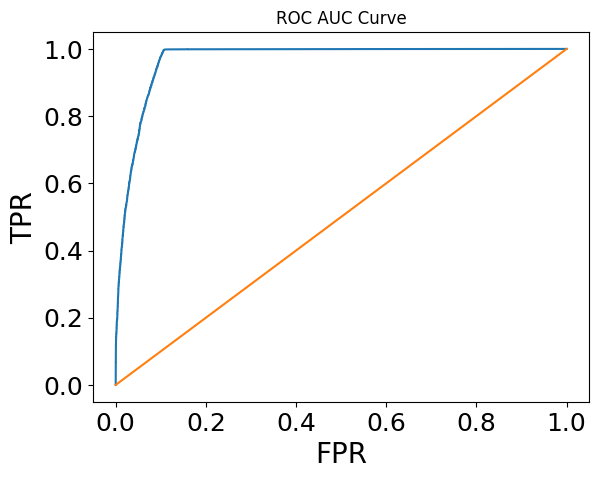

In [17]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score, log_loss, f1_score

print('log loss:', log_loss(y_test, y_pred_probs, sample_weight=w_test))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_probs[:, 1], pos_label=1, sample_weight=w_test)
metrics.auc(fpr, tpr)
print('roc auc:', metrics.auc(fpr, tpr))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
y_pred_opt = y_pred_probs[:, 1] > optimal_threshold
print('f1 score:', f1_score(y_test, y_pred_opt))
plt.plot(fpr, tpr)
plt.plot(fpr, fpr)
plt.xlabel("FPR", fontsize=20)
plt.ylabel("TPR", fontsize=20)
plt.xticks(fontsize = 18) 
plt.yticks(fontsize = 18) 
plt.title('ROC AUC Curve')

In [18]:
pred_baseline = np.ones_like(y_test) * y_test.mean()
print("baseline auc:", roc_auc_score(y_test, pred_baseline))
print("baseline log_loss:", log_loss(y_test, pred_baseline))

baseline auc: 0.5
baseline log_loss: 0.028904685615287216


In [109]:
i = 255000
print(round(tpr[i],3),round(fpr[i]/tpr[i],4))
print(thresholds[i],fpr[i],tpr[i])
#print((fpr[i]/tpr[i]*data1.shape[0]/data2.shape[0]/10)**-1,(fpr[i]/1.*data1.shape[0]/data2.shape[0]/10)**-1)

0.985 0.104
0.20247530966766503 0.10236728375153197 0.9847429124835613


In [64]:
print(sum(predicted),len(predicted))

2621245 3431227


In [65]:
kek_data = data
kek_data = kek_data.drop(columns = ['IsTrue0'])
proba_loc = clf.predict_proba(kek_data)
print(proba_loc[0][1])

0.8466896267897025


In [66]:
import ROOT as root
outfile = root.TFile.Open("output/BDT_Hits_test1.root", "recreate")
e_pt_hist_AI = root.TH2D("e_pt_hist_AI", "e_pt_hist_AI", 50, 0, 5, 10, 0, 100)
h_pt_hist_AI = root.TH2D("h_pt_hist_AI", "h_pt_hist_AI", 50, 0, 5, 10, 0, 100)
e_pt_hist_SC = root.TH2D("e_pt_hist_SC", "e_pt_hist_SC", 50, 0, 5, 10, 0, 100)
h_pt_hist_SC = root.TH2D("h_pt_hist_SC", "h_pt_hist_SC", 50, 0, 5, 10, 0, 100)
e_pt_hist_NC = root.TH2D("e_pt_hist_NC", "e_pt_hist_NC", 50, 0, 5, 10, 0, 100)
h_pt_hist_NC = root.TH2D("h_pt_hist_NC", "h_pt_hist_NC", 50, 0, 5, 10, 0, 100)

In [67]:
mycute,mycuth, AIcute, AIcuth = 0.1, 0.1, 0.1, 0.1
norm_e, norm_h = 0.1, 0.1
data0 = data.reset_index()  # make sure indexes pair with number of rows

sigma = 3

counter =-1
for index, row in data0.iterrows():
    counter+=1
    if counter>1000000: break
    sdphi0, sdphi1, sdphi2, sdphi3 = 0, 0, 0, 0
    sdthe0, sdthe1, sdthe2, sdthe3 = 0, 0, 0, 0
    centrality, pt, IsTrue0 = row['Centrality'], row['Pt'], row['IsTrue0']

    if pt<0.4 or centrality<0: continue
    if IsTrue0: e_pt_hist_NC.Fill(pt,centrality)
    else:    h_pt_hist_NC.Fill(pt,centrality)
    if ( abs(sdphi0) < sigma and abs(sdthe0) < sigma and abs(sdphi1) < sigma and abs(sdthe1) < sigma ) and ( ( abs(sdphi2) < sigma and abs(sdthe2) < sigma ) or ( abs(sdphi3) < sigma and abs(sdthe3) < sigma ) ):
        if IsTrue0: 
            mycute+=1
            e_pt_hist_SC.Fill(pt,centrality)
        else: 
            mycuth+=1+hadron_weight
            h_pt_hist_SC.Fill(pt,centrality)
    if proba_loc[counter][1]>thresholds[i]: 
        if IsTrue0: 
            AIcute+=1
            e_pt_hist_AI.Fill(pt,centrality)
        else: 
            AIcuth+=1+hadron_weight
            h_pt_hist_AI.Fill(pt,centrality)
    if IsTrue0: norm_e+=1
    else: norm_h+=1+hadron_weight
    #if counter<10: 
    #    print(proba_loc[counter],answer(centrality,pt,ep,n0,disp,chi2,npe0,prob))
        #print(centrality, pt, ep, n0, disp, chi2, npe0, prob, phi0 )

In [68]:
print(norm_e, norm_h,round(mycute/norm_e,3),round(mycuth/norm_h,3), round(AIcute/norm_e,3), round(AIcuth/norm_h,3), round(AIcuth/AIcute/norm_h*norm_e,3),round(fpr[i]/tpr[i],3))

849104.1 5869847.1 1.0 1.0 0.984 0.104 0.105 0.104


In [69]:
print(round(AIcute/mycute/(AIcuth/mycuth),3),round(AIcute/mycute,3),round(AIcuth/mycuth,3), round(30*AIcute/norm_e/AIcuth*norm_h))

9.499 0.984 0.104 285


In [70]:
%run input/Format.ipynb

/home/yoren/.local/lib/python3.10/site-packages/nbformat/__init__.py:96: MissingIDFieldWarning: Cell is missing an id field, this will become a hard error in future nbformat versions. You may want to use `normalize()` on your notebooks before validations (available since nbformat 5.1.4). Previous versions of nbformat are fixing this issue transparently, and will stop doing so in the future.
  validate(nb)


26.0 4320.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


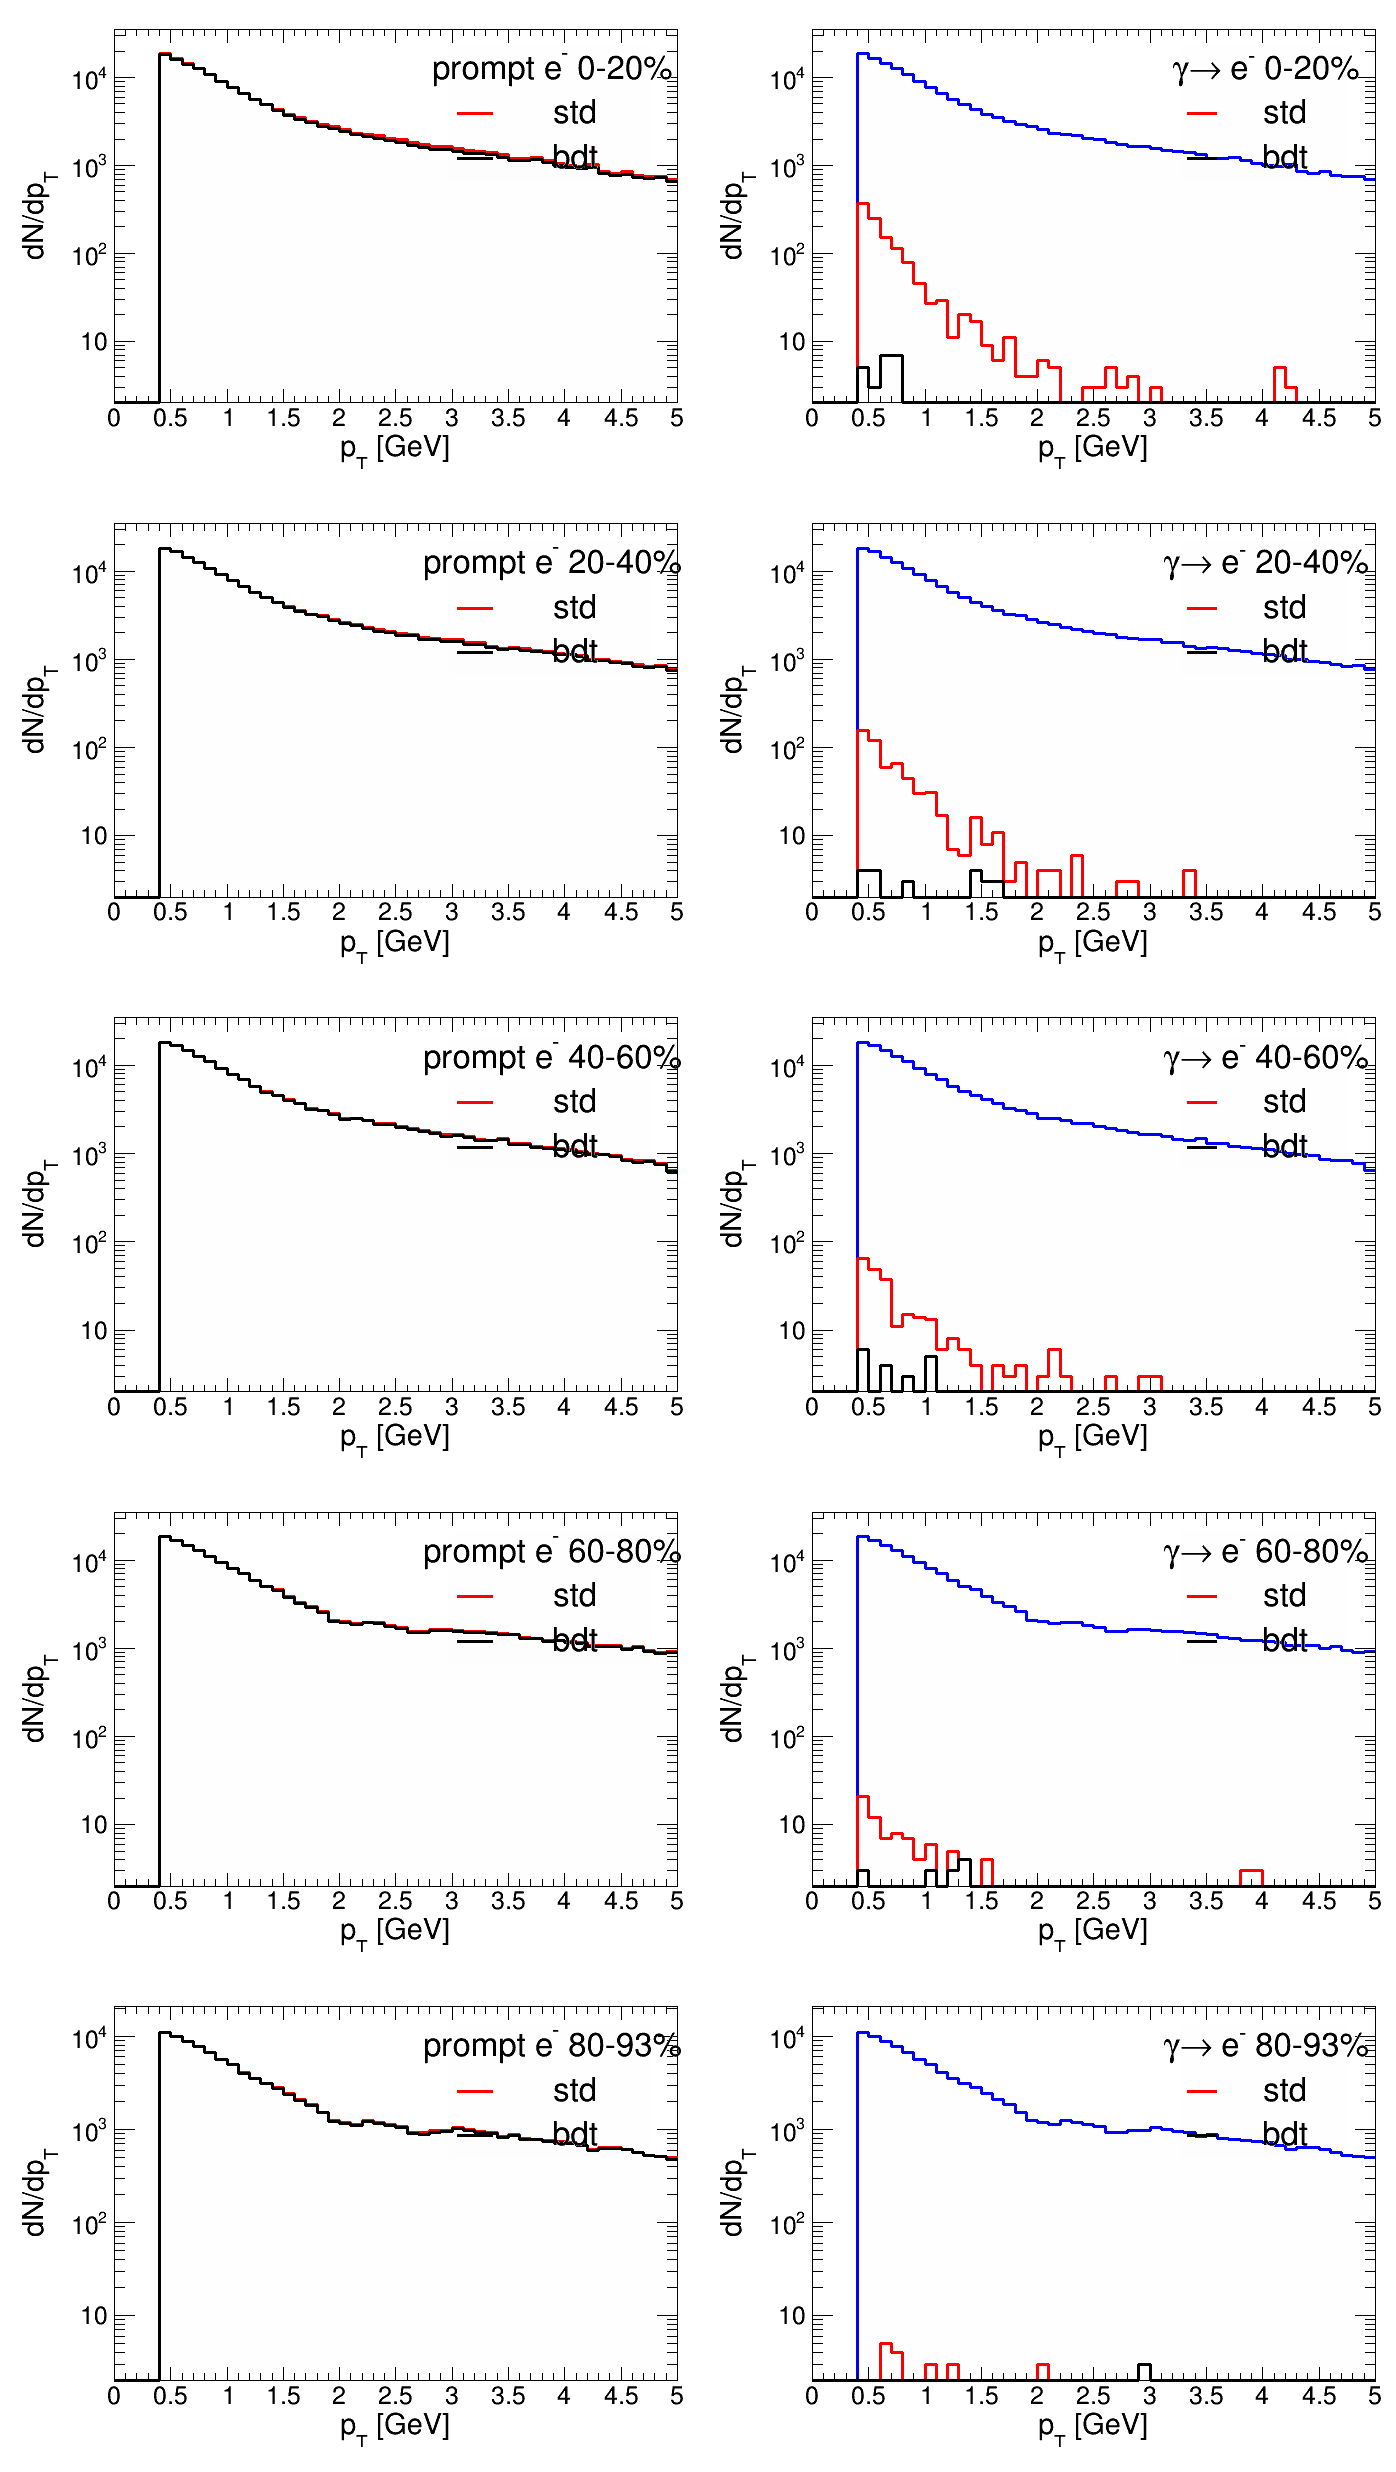

In [71]:
c1 = root.TCanvas("c1","c1",1400,2500)
c1.Divide(2,5)
part_names_legend= [ "prompt e^{-} " , "#gamma#rightarrow e^{-} "]
centralities_legend = ["0-20%","20-40%","40-60%","60-80%","80-93%"]
legends = []
for icentr in range(5):

    c1.cd(1+2*icentr)
    root.gPad.SetLogy()
    e_pt_hist_NC.ProjectionX(f"e_pt_hist_NC_{icentr}").SetLineWidth(3)
    e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}").SetLineWidth(3)
    e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}").SetLineWidth(3)
    e_pt_hist_NC.SetLineColor(4)
    e_pt_hist_SC.SetLineColor(2)
    e_pt_hist_AI.SetLineColor(1)
    proj = e_pt_hist_NC.ProjectionX(f"e_pt_hist_NC_{icentr}",2*icentr+1,2*icentr+2)
    proj.SetMinimum(2)
    Format_Hist_total(proj, title_x="p_{T} [GeV]",  title_y="dN/dp_{T}", left=0.15, bottom=0.15, right=0.01, top=0.01,  Tsize=0.07,  Lsize=0.06,\
                      Mstyle=21,  Msize=2, Mcolor=4,  Lwidth=3,  Lcolor=4,  offset_x=1, offset_y=1, title="",  Malpha=1,  Lalpha=1)
    proj.Draw()
    e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2).Draw("same")
    e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2).Draw("same")

    legends.append(Draw_Legend_Title(0.65,0.65,0.95,0.95,part_names_legend[0]+centralities_legend[icentr],TextSize=0.08, align =22, LineWidth=0, Color=1,  alpha=0))
    legends[-1].AddEntry(e_pt_hist_SC.ProjectionX(f"e_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2),"std","l")
    legends[-1].AddEntry(e_pt_hist_AI.ProjectionX(f"e_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2),"bdt","l")
    legends[-1].Draw()

    c1.cd(2+2*icentr)
    root.gPad.SetLogy()
    h_pt_hist_NC.ProjectionX(f"h_pt_hist_NC_{icentr}").SetLineWidth(3)
    h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}").SetLineWidth(3)
    h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}").SetLineWidth(3)
    h_pt_hist_NC.SetLineColor(4)
    h_pt_hist_SC.SetLineColor(2)
    h_pt_hist_AI.SetLineColor(1)
    projh = h_pt_hist_NC.ProjectionX(f"h_pt_hist_NC_{icentr}",2*icentr+1,2*icentr+2)
    Format_Hist_total(projh, title_x="p_{T} [GeV]",  title_y="dN/dp_{T}", left=0.15, bottom=0.15, right=0.01, top=0.01,  Tsize=0.07,  Lsize=0.06,\
                      Mstyle=21,  Msize=2, Mcolor=4,  Lwidth=3,  Lcolor=4,  offset_x=1, offset_y=1, title="",  Malpha=1,  Lalpha=1)
    projh.SetMinimum(2)
    proj.Draw()
    h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2).Draw("same")
    h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2).Draw("same")

    legends.append(Draw_Legend_Title(0.7,0.65,0.95,0.95,part_names_legend[1]+centralities_legend[icentr],TextSize=0.08, align =22, LineWidth=0, Color=1,  alpha=0))
    legends[-1].AddEntry(h_pt_hist_SC.ProjectionX(f"h_pt_hist_SC_{icentr}",2*icentr+1,2*icentr+2),"std","l")
    legends[-1].AddEntry(h_pt_hist_AI.ProjectionX(f"h_pt_hist_AI_{icentr}",2*icentr+1,2*icentr+2),"bdt","l")
    legends[-1].Draw()
c1.Draw()
print(h_pt_hist_NC.GetBinContent(10,1),e_pt_hist_NC.GetBinContent(10,1))

In [72]:
if False:
    e_pt_hist_AI.Write()
    h_pt_hist_AI.Write()
    e_pt_hist_SC.Write()
    h_pt_hist_SC.Write()
    e_pt_hist_NC.Write()
    h_pt_hist_NC.Write()
    outfile.Close()

In [73]:
import pickle
with open('output/bdt_hit.pkl','wb') as f:
    pickle.dump(clf,f)

print(clf.predict(kek_data[0:10]))

[1 1 1 1 1 1 1 1 1 1]


In [74]:
import pickle
# load
with open('output/bdt_hit.pkl', 'rb') as f:
    clf2 = pickle.load(f)
print(clf2.predict(kek_data[0:10]))

[1 1 1 1 1 1 1 1 1 1]


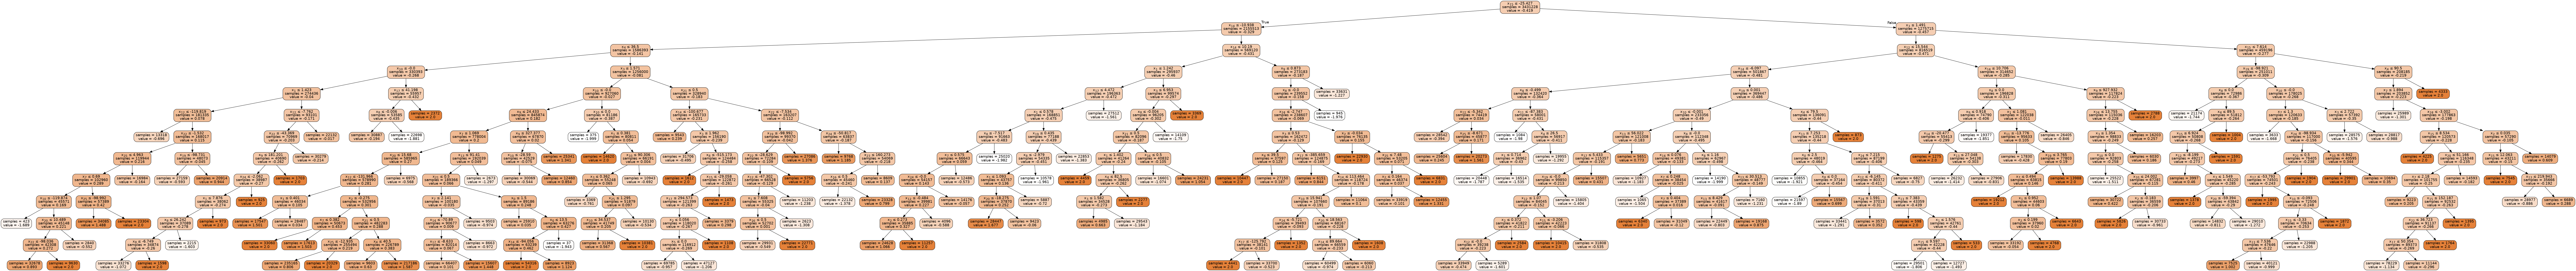

In [75]:
sub_tree_42 = clf2.best_estimator_[0, 0]
from sklearn.tree import export_graphviz, export_text
from sklearn.tree import _tree
# Visualization
# Install graphviz: https://www.graphviz.org/download/
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)

graph = graph_from_dot_data(dot_data)
png = graph.create_png()
# Save (optional)
from pathlib import Path
Path('output/out.png').write_bytes(png)
# Display
Image(png)

In [76]:
clf2.predict(kek_data[0:100])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1], dtype=int32)

In [77]:
clf2.predict_proba(kek_data[0:100])

array([[0.15331037, 0.84668963],
       [0.29099949, 0.70900051],
       [0.03412305, 0.96587695],
       [0.04729731, 0.95270269],
       [0.03765012, 0.96234988],
       [0.1417561 , 0.8582439 ],
       [0.31457368, 0.68542632],
       [0.18559654, 0.81440346],
       [0.15972744, 0.84027256],
       [0.25182291, 0.74817709],
       [0.16920125, 0.83079875],
       [0.21386548, 0.78613452],
       [0.50690805, 0.49309195],
       [0.21231287, 0.78768713],
       [0.7649661 , 0.2350339 ],
       [0.67060532, 0.32939468],
       [0.16132081, 0.83867919],
       [0.68256223, 0.31743777],
       [0.71745022, 0.28254978],
       [0.15656887, 0.84343113],
       [0.23745617, 0.76254383],
       [0.73449825, 0.26550175],
       [0.3594401 , 0.6405599 ],
       [0.02667109, 0.97332891],
       [0.03668559, 0.96331441],
       [0.155702  , 0.844298  ],
       [0.54377281, 0.45622719],
       [0.25799095, 0.74200905],
       [0.05111753, 0.94888247],
       [0.77784009, 0.22215991],
       [0.

In [78]:
print( clf2.best_params_)

{'criterion': 'squared_error', 'learning_rate': 0.2, 'loss': 'log_loss', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_split': 0.01, 'n_estimators': 20}


In [79]:
clf2.best_estimator_.predict_proba(kek_data[9:20])

array([[0.25182291, 0.74817709],
       [0.16920125, 0.83079875],
       [0.21386548, 0.78613452],
       [0.50690805, 0.49309195],
       [0.21231287, 0.78768713],
       [0.7649661 , 0.2350339 ],
       [0.67060532, 0.32939468],
       [0.16132081, 0.83867919],
       [0.68256223, 0.31743777],
       [0.71745022, 0.28254978],
       [0.15656887, 0.84343113]])

In [80]:
y = clf2.best_estimator_[0, 0].predict(kek_data[9:19].values.tolist())*0
#y = gb_clf.decision_function(kek_data[9:20])

rate = clf2.best_params_['learning_rate']
print(rate)
for i in range(0,10):
    sub_tree = clf2.best_estimator_[i, 0]
    y += rate*sub_tree.predict(kek_data[9:19].values.tolist())
print(y)
print(gb_clf.decision_function(kek_data[9:20]))
z=y
for i in range(len(z)): 
    z[i] = 1./(1+np.exp(-z[i]))
print(z)

0.2
[ 0.41563092  1.30120325  0.84453235  0.10938811  0.61981452 -1.05782805
 -0.52630854  1.2003998  -0.80273665 -1.28536844]
[-0.25083264 -0.52214828 -0.21720202 -2.81678971 -0.13408467 -0.21720202
 -1.50190243 -0.68147034 -0.21720202 -1.8588173  -1.05828479]
[0.6024373  0.78603742 0.69941892 0.52731979 0.65017636 0.25772474
 0.37137827 0.7685959  0.30944043 0.21663778]


In [81]:
best_gbc = clf2.best_estimator_

In [82]:
n_estim = best_gbc.n_estimators

In [83]:
learning_rate = best_gbc.learning_rate
print(clf2.decision_function(kek_data[9:19]))
arr = clf2.decision_function(kek_data[9:19])
print(1./(1.+np.exp(-arr)))
#tree_scores = [best_gbc.estimators_[i, 0].decision_function(kek_data[9:19].values.tolist()) for i in range(10)]
print(learning_rate)

[ 1.08891359  1.59129873  1.30178071 -0.02763395  1.31104001 -1.18010174
 -0.71092411  1.64843324 -0.76557192 -0.93184883]
[0.74817709 0.83079875 0.78613452 0.49309195 0.78768713 0.2350339
 0.32939468 0.83867919 0.31743777 0.28254978]
0.2


In [84]:
log_odds_predictions = []
for tree in clf2.best_estimator_:
    # For each tree, get the predicted values for each sample
    leaf_indices = tree[0].apply(kek_data[9:19].values.tolist())  # Get the leaf indices for the training data
    leaf_values = tree[0].tree_.value  # Get the values at each leaf

    # Average the values for each leaf to interpret them as log odds
    predicted_log_odds = [leaf_values[leaf_indices[i]].mean() for i in range(len(kek_data[9:19]))]
    log_odds_predictions.append(predicted_log_odds)

In [85]:
print(log_odds_predictions)

[[1.1242230587411364, 2.0, -1.0722242385326224, 0.8746062696865157, 0.03447228820976298, -1.0722242385326224, -0.9884463656571514, 0.9437601182515661, -1.206315603031287, -1.743806933313861], [-0.8597102540199799, 0.8491116221042685, -0.8442746415325497, -1.1018545087136689, 1.891342808824363, -1.1986591624879261, -1.6240084638884869, 1.4897966389342165, -0.7595419799996823, -1.0927258836463436], [-0.5508142730424247, 0.9698803265293624, 1.94556639660157, 1.050661514334923, -0.2266697076951496, -0.7823550943591318, -0.9962386604628792, 1.519663866572395, -0.4637199862663567, -0.7955499363227572], [-0.7043703074758656, 0.5132018967811902, 1.30134698534882, -0.39568791567529593, 0.099872918208055, -0.7426982200589198, -0.6026847535582536, -0.4159083703230054, -0.3313310522784798, -0.6026847535582536], [1.2241607522785725, 0.1638503941954477, 1.7072266381684398, -0.7008197210320878, -0.42557169431010483, -0.6298236842595631, -0.2346279506634153, 0.15386835063191973, -0.015695646511154394,

In [86]:
rate = clf2.best_params_['learning_rate']
myarr = [log_odds_predictions[i][0] for i in range(10)]
print(rate,rate*sum(myarr))
print(clf2.decision_function(kek_data[9:19]))

0.2 0.41563091855106116
[ 1.08891359  1.59129873  1.30178071 -0.02763395  1.31104001 -1.18010174
 -0.71092411  1.64843324 -0.76557192 -0.93184883]


In [87]:
print(best_gbc.estimators_.shape[0])
print(best_gbc.estimators_.shape[1])
y = []
for i in range(10):
    y0=[]
    for j in range(n_estim):
        sub_tree = clf2.best_estimator_[j, 0]
        y0.append(sub_tree.predict(kek_data[9+i:10+i].values.tolist())[0])
    y.append(y0)
print(y)

20
1
[[1.1242230587411364, -0.8597102540199799, -0.5508142730424247, -0.7043703074758656, 1.2241607522785725, 0.4007744227030624, -0.3099193145979724, 0.035747578503300154, 1.4710821041755757, 0.2469808254899015, -0.1377817393547867, 1.2684721463723192, 1.2405424591523793, -0.24165910826866452, 1.1321229518049578, -0.400730005823452, 0.2439245486396415, 0.061629128224115745, 0.03921902826352236, 0.16067392841037212], [2.0, 0.8491116221042685, 0.9698803265293624, 0.5132018967811902, 0.1638503941954477, -0.18821273965772892, 0.19826898843967927, 0.39309805342536214, 0.22063849402166433, 1.3861792064601721, -0.1377817393547867, 0.05562158657013846, 1.4865404047188402, 0.10499918127816701, 0.08702431686923623, -0.4192435630872504, -0.3692572682352502, 0.061629128224115745, 0.5239317494566111, 0.057013622261212975], [-1.0722242385326224, -0.8442746415325497, 1.94556639660157, 1.30134698534882, 1.7072266381684398, 1.57663815128418, -0.3390231005181432, -0.11898880773636115, 0.017050762567976

In [88]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        #feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {threshold})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {threshold})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if ( "
        
        for p in path[:-1]:
            if rule != "if ( ":
                rule += " && "
            rule += str(p)
        rule += " ) "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f";  // | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules


In [89]:
import numpy as np
from sklearn.tree import _tree
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        #feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {threshold})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {threshold})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if  "
        
        for p in path[:-1]:
            if rule != "if  ":
                rule += " if "
            rule += str(p)
        rule += "  "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f";  // | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [90]:
column_headers = list(kek_data.columns.values)
print(column_headers)
print(len(column_headers))

['NBDThit', 'Pt', 'Alpha', 'Ecore', 'Centrality', 'Charge', 'Arm', 'reconpt', 'SecondHitPhiR0', 'SecondHitPhiL0', 'SecondHitTheR0', 'SecondHitTheL0', 'SecondHitPhiR1', 'SecondHitPhiL1', 'SecondHitTheR1', 'SecondHitTheL1', 'sdphi2', 'SecondHitPhiR2', 'SecondHitPhiL2', 'SecondHitTheR2', 'SecondHitTheL2', 'sdphi3', 'SecondHitPhiR3', 'SecondHitPhiL3', 'SecondHitTheR3', 'SecondHitTheL3']
26


In [91]:
#print(f"double mytree{list(kek_data.columns)}")
print('{')
for iestim in range(n_estim):
    print(f"    if (iestim == {iestim})")
    print('    {')
    sub_tree = clf2.best_estimator_[iestim, 0]
    rules = get_rules(sub_tree, list(kek_data.columns), None)
    for r in rules:
        print("       ",r)
    print('    }')
print ('    return -9999;')
print('};')

{
    if (iestim == 0)
    {
        if  (x[15] <= -25.426898956298828) if (x[14] <= -10.937663078308105) if (x[4] > 36.5) if (x[3] <= 1.5705780386924744) if (x[10] <= -2.6568541215965524e-06) if (x[9] <= 24.43289852142334) if (x[7] <= 1.0691344141960144) if (x[20] <= 15.68026065826416) if (x[12] > -131.9659423828125) if (x[2] > -0.2750244140625) if (x[21] <= 0.5) if (x[25] <= -12.93455457687378)   return 0.8060805871734817;  // | based on 235,165 samples
        if  (x[15] <= -25.426898956298828) if (x[14] <= -10.937663078308105) if (x[4] > 36.5) if (x[3] <= 1.5705780386924744) if (x[10] <= -2.6568541215965524e-06) if (x[9] <= 24.43289852142334) if (x[7] <= 1.0691344141960144) if (x[20] <= 15.68026065826416) if (x[12] > -131.9659423828125) if (x[2] > -0.2750244140625) if (x[21] > 0.5) if (x[4] > 40.5)   return 1.5869290545283379;  // | based on 217,186 samples
        if  (x[15] > -25.426898956298828) if (x[3] > 1.4913795590400696) if (x[15] > 7.61394739151001) if (x[4] <= 90.5) if (x

In [92]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        f'x[{i}]' if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {threshold})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {threshold})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " : "
        if class_names is None:
            rule += " return "+str(np.round(path[-1][0][0][0],30))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),20)}%)"
        rule += f"  # | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules


In [93]:
print(f"def mytree( iestim,  x ) :")
for iestim in range(n_estim):
    print(f"    if iestim == {iestim}:")
    sub_tree = clf2.best_estimator_[iestim, 0]
    rules = get_rules(sub_tree, list(kek_data.columns), None)
    for r in rules:
        print("       ",r)
print ('    return -9999')

def mytree( iestim,  x ) :
    if iestim == 0:
        if (x[15] <= -25.426898956298828) and (x[14] <= -10.937663078308105) and (x[4] > 36.5) and (x[3] <= 1.5705780386924744) and (x[10] <= -2.6568541215965524e-06) and (x[9] <= 24.43289852142334) and (x[7] <= 1.0691344141960144) and (x[20] <= 15.68026065826416) and (x[12] > -131.9659423828125) and (x[2] > -0.2750244140625) and (x[21] <= 0.5) and (x[25] <= -12.93455457687378) :  return 0.8060805871734817  # | based on 235,165 samples
        if (x[15] <= -25.426898956298828) and (x[14] <= -10.937663078308105) and (x[4] > 36.5) and (x[3] <= 1.5705780386924744) and (x[10] <= -2.6568541215965524e-06) and (x[9] <= 24.43289852142334) and (x[7] <= 1.0691344141960144) and (x[20] <= 15.68026065826416) and (x[12] > -131.9659423828125) and (x[2] > -0.2750244140625) and (x[21] > 0.5) and (x[4] > 40.5) :  return 1.5869290545283379  # | based on 217,186 samples
        if (x[15] > -25.426898956298828) and (x[3] > 1.4913795590400696) and (x[15] > 7.61

In [ ]:
def mytree(x,y):
    return 0

In [101]:
def mygradboost (x, lerning_rate = 0.2):
    prob = 0
    for i in range (n_estim):
        prob+=lerning_rate*mytree(i, x)
    return 1. / ( 1. + np.exp( - prob ) )


In [102]:
def mybdt(x, prob):
    if mygradboost(x)>prob: return 1
    return  

In [103]:
iestim = 9
sub_tree = clf2.best_estimator_[iestim, 0]
y = sub_tree.predict(kek_data[9:19].values.tolist())
print(y)

myf = [mytree(iestim, kek_data[9+i:10+i].values.tolist()[0]) for i in range(10)]
print(myf)

[ 0.24698083  1.38617921  0.04934359 -0.52026621  1.3829988  -0.21469347
 -0.19470097 -0.61172121 -0.21469347  0.0292024 ]
[0.2469808254899015, 1.3861792064601723, 0.04934358871793037, -0.5202662115301147, 1.3829987976934635, -0.21469347218211396, -0.19470097041000656, -0.611721211649706, -0.21469347218211396, 0.029202399242709984]


In [104]:
iestim = 9
sub_tree = clf2.best_estimator_
y = sub_tree.predict_proba(kek_data[9:19].values.tolist())
y = [y[i][1] for i in range(len(y))]
print(y)

myf = [mygradboost(kek_data[9+i:10+i].values.tolist()[0]) for i in range(10)]
print(myf)

[0.7481770875742397, 0.830798747135822, 0.7861345213204357, 0.49309195272973194, 0.7876871347147248, 0.23503390395531681, 0.32939467760925445, 0.8386791861807906, 0.31743776627440096, 0.282549777719056]
[0.7481770875742397, 0.830798747135822, 0.7861345213204357, 0.49309195272973194, 0.7876871347147248, 0.23503390395531681, 0.3293946776092544, 0.8386791861807906, 0.31743776627440096, 0.282549777719056]


/home/yoren/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [105]:
column_headers = list(kek_data.columns.values)
print(column_headers)
print(len(column_headers))

['NBDThit', 'Pt', 'Alpha', 'Ecore', 'Centrality', 'Charge', 'Arm', 'reconpt', 'SecondHitPhiR0', 'SecondHitPhiL0', 'SecondHitTheR0', 'SecondHitTheL0', 'SecondHitPhiR1', 'SecondHitPhiL1', 'SecondHitTheR1', 'SecondHitTheL1', 'sdphi2', 'SecondHitPhiR2', 'SecondHitPhiL2', 'SecondHitTheR2', 'SecondHitTheL2', 'sdphi3', 'SecondHitPhiR3', 'SecondHitPhiL3', 'SecondHitTheR3', 'SecondHitTheL3']
26
